
image 1/1 C:\Users\PC\Documents\CITHA\citha-visao-computacional\Capitulo-03 ExtracaoCaracteristicas\YOLO\cachorros.png: 448x640 5 dogs, 61.5ms
Speed: 3.9ms preprocess, 61.5ms inference, 5.3ms postprocess per image at shape (1, 3, 448, 640)


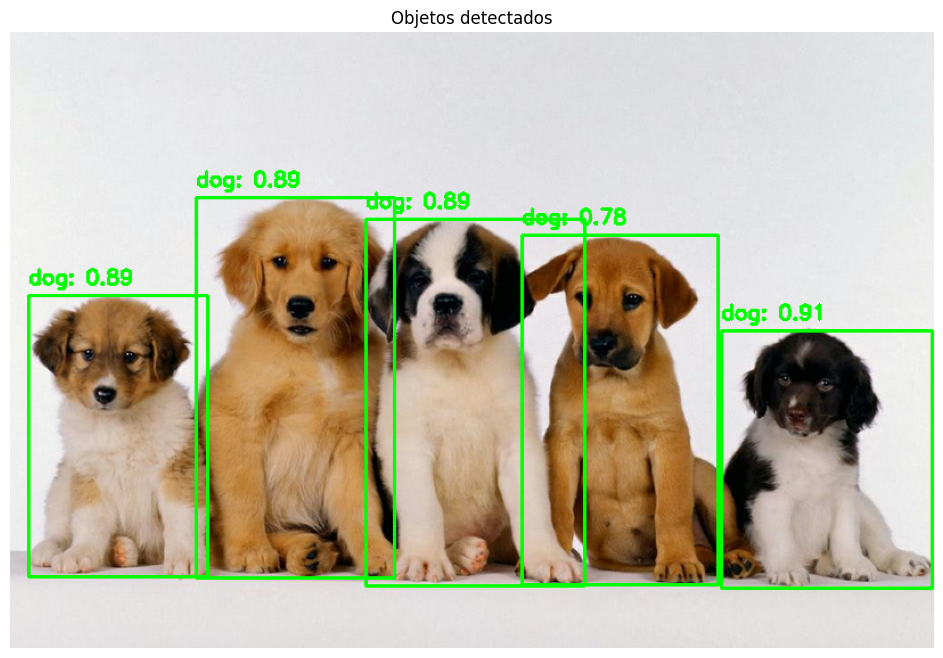

In [1]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Carregar o modelo pré-treinado
model = YOLO('yolov8n.pt')

# Caminho da imagem
caminho_imagem = "cachorros.png"

# Fazer a predição na imagem
results = model.predict(source=caminho_imagem, conf=0.6)

# Carregar a imagem original para desenhar sobre ela
image = cv2.imread(caminho_imagem)

# Obter as caixas delimitadoras e os nomes das classes
boxes = results[0].boxes
names = model.names

# Iterar sobre cada objeto detectado
for box in boxes:
    # Coordenadas da caixa delimitadora (bounding box)
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    
    # Confiança e ID da classe
    conf = float(box.conf[0])
    cls_id = int(box.cls[0])
    label = f"{names[cls_id]}: {conf:.2f}"
    
    # Desenhar o retângulo e o rótulo na imagem
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, label, (x1, y1 - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Converter a imagem de BGR para RGB para exibir com Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Exibir a imagem com as detecções
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Objetos detectados")
plt.show()